In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [26]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [28]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
Session = Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Determine column information for Measurement
Inspector = inspect(engine)
Columns = Inspector.get_columns('Measurement')
for column in Columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [34]:
# Determine column information for Station
Inspector = inspect(engine)
Columns = Inspector.get_columns('Station')
for column in Columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [35]:
# Find the most recent date in the data set.
Latest_Date = Session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Latest_Date

('2017-08-23')

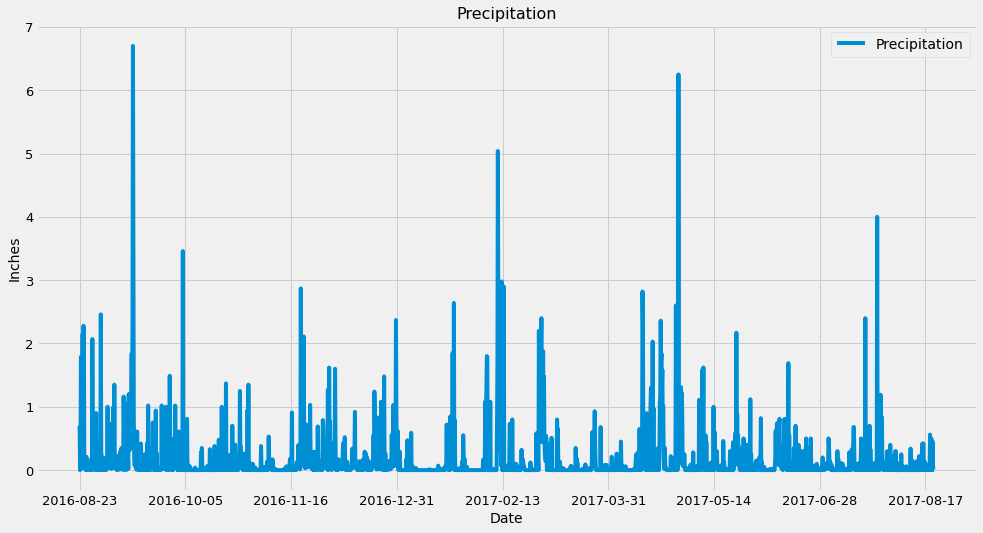

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
One_Year_Ago_Latest = dt.date(2017,8,23) - dt.timedelta(days = 365)
One_Year_Ago_Latest

# Perform a query to retrieve the data and precipitation scores
One_Year_Ago_Precip = Session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date >= One_Year_Ago_Latest).order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
Precip_Data = pd.DataFrame(One_Year_Ago_Precip, columns = ["Date", "Precipitation"])
Precip_Data.set_index('Date', inplace = True)

# Sort the dataframe by date
Precip_Data.sort_values('Date', inplace = True)
Precip_Data.dropna(inplace = True)
Precip_Data.head()

# Use Pandas Plotting with Matplotlib to plot the data
Precip_Data.plot(figsize=(15,8), fontsize = 13)
plt.title("Precipitation", fontsize = 16)
plt.ylabel("Inches", fontsize = 14)
plt.xlabel("Date", fontsize = 14)
plt.legend(loc='upper right')
plt.savefig("Output/Precipitation.png")
plt.show()

In [41]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precip_Data.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()